In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Loading the Dataset
mnist = tf.keras.datasets.mnist


In [ ]:
# Dividing the Images and their Outputs into x_train and x_test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


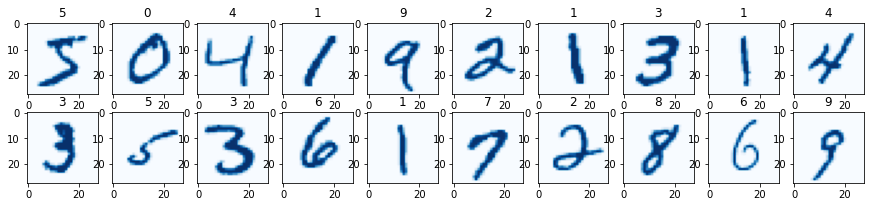

In [ ]:
# Checking the Dataset Images that need to be identified by the Neural Network
fig = plt.figure(figsize = (15, 3))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1)
  ax.imshow(np.squeeze(x_train[i]), cmap = 'Blues')
  ax.set_title(y_train[i])

In [ ]:
# Printing the Data Images in Metrics form
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [ ]:
# Normalizing the Matrix Array of Number Images
xtrain = x_train/255.0
xtest = x_test/255.0

In [ ]:
# Flattening the 2-Dimensional Array into 1-Dimensional Array or a Single Column, which will behave as 1st Inpur Layer for Neural Network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), tf.keras.layers.Dense(128, activation = 'relu'), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Using of AdamOptimizer
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting of the Training Data into the Model for 5 Iterations
# 98% Accuracy achieved with 5 iterations
model.fit(xtrain, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2593 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0765 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9860


In [ ]:
# Fitting of the Training Data into the Model for 9 Iterations
# 99% Accuracy achieved with 9 iterations
model.fit(xtrain, y_train, epochs = 9)

Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 8/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - accuracy: 0.9976


In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 1ms/step - loss: 21.4692 - accuracy: 0.9778
[21.46917152404785, 0.9778000116348267]


In [ ]:
# # 97 % of Total Accuracy of our Neural Network has been achieved
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 4.7257 - accuracy: 0.9892 - val_loss: 3.0247 - val_accuracy: 0.9927
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.8639 - accuracy: 0.9945 - val_loss: 4.5722 - val_accuracy: 0.9915
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.9476 - accuracy: 0.9946 - val_loss: 1.7291 - val_accuracy: 0.9942
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.8497 - accuracy: 0.9949 - val_loss: 2.6194 - val_accuracy: 0.9930
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.6766 - accuracy: 0.9948 - val_loss: 3.4423 - val_accuracy: 0.9922
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.4899 - accuracy: 0.9954 - val_loss: 4.1955 - val_accuracy: 0.9898
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.8196 - accuracy: 0.9948 - val_loss: 5.5287 - val_accuracy:

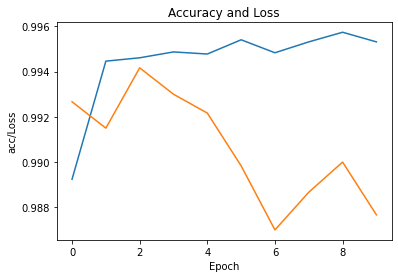

In [ ]:
# Plotting Accuracy of Model
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history["val_accuracy"], label = 'val')
plt.show()

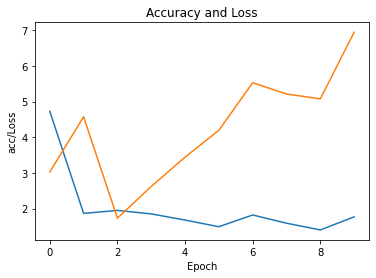

In [ ]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'], label = 'acc')
plt.plot(history.history["val_loss"], label = 'val')
plt.show()

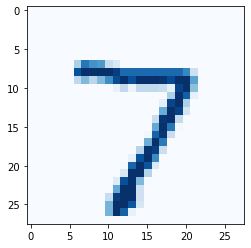

In [ ]:
# Testing Our Model
plt.imshow(np.squeeze(x_test[0]), cmap = "Blues")

In [ ]:
prediction = model.predict(x_test)
print(np.argmax(prediction[0]))

7


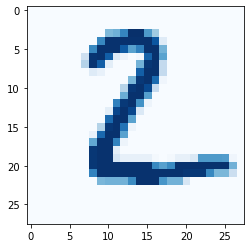

In [ ]:
plt.imshow(np.squeeze(x_test[1]), cmap = "Blues")

In [ ]:
prediction = model.predict(x_test)
print(np.argmax(prediction[1]))

2


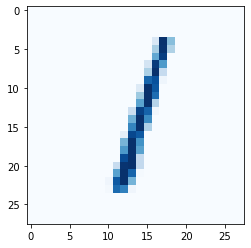

In [ ]:
plt.imshow(np.squeeze(x_test[2]), cmap = "Blues")

In [ ]:
prediction = model.predict(x_test)
print(np.argmax(prediction[2]))

1


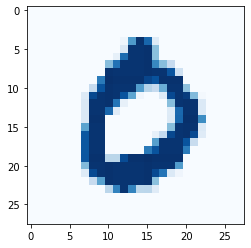

In [ ]:
plt.imshow(np.squeeze(x_test[3]), cmap = "Blues")

In [ ]:
prediction = model.predict(x_test)
print(np.argmax(prediction[3]))

0
